
Chan.py:131--------------------------


Chan.py:132:data_src DATA_SRC.BAO_STOCK
Chan.py:133:stockapi_cls <class 'DataAPI.BaoStockAPI.CBaoStock'>
login success!

Chan.py:139--------------------------


[None]

BaoStockAPI.py:62 >>>>>>>>>>>>>>>>>>>##### 打印结果集 ####<<<<<<<<<<<<<<<<


类型:DataFrame

         date           open           high            low          close     volume           amount      turn
0  2018-01-02  12.4562842500  12.9974561500  12.4282926000  12.7828535000  208159255  2856543822.1800  1.230402
1  2018-01-03  12.8108451500  12.9321423000  12.3163260000  12.4376231500  296249840  4006220766.9400  1.751094
2  2018-01-04  12.4282926000  12.4749453500  12.2510121500  12.3629787500  185450948  2454543516.4100  1.096176
3  2018-01-05  12.3256565500  12.4562842500  12.2696732500  12.4096315000  121031272  1603289517.9300  0.715400
4  2018-01-08  12.3629787500  12.4003009500  11.9990873000  12.0923928000  215862081  2806099169.6600  1.275932
5  2018-01-09  12.0923928000  12

KeyError: <TREND_TYPE.MAX: 'max'>

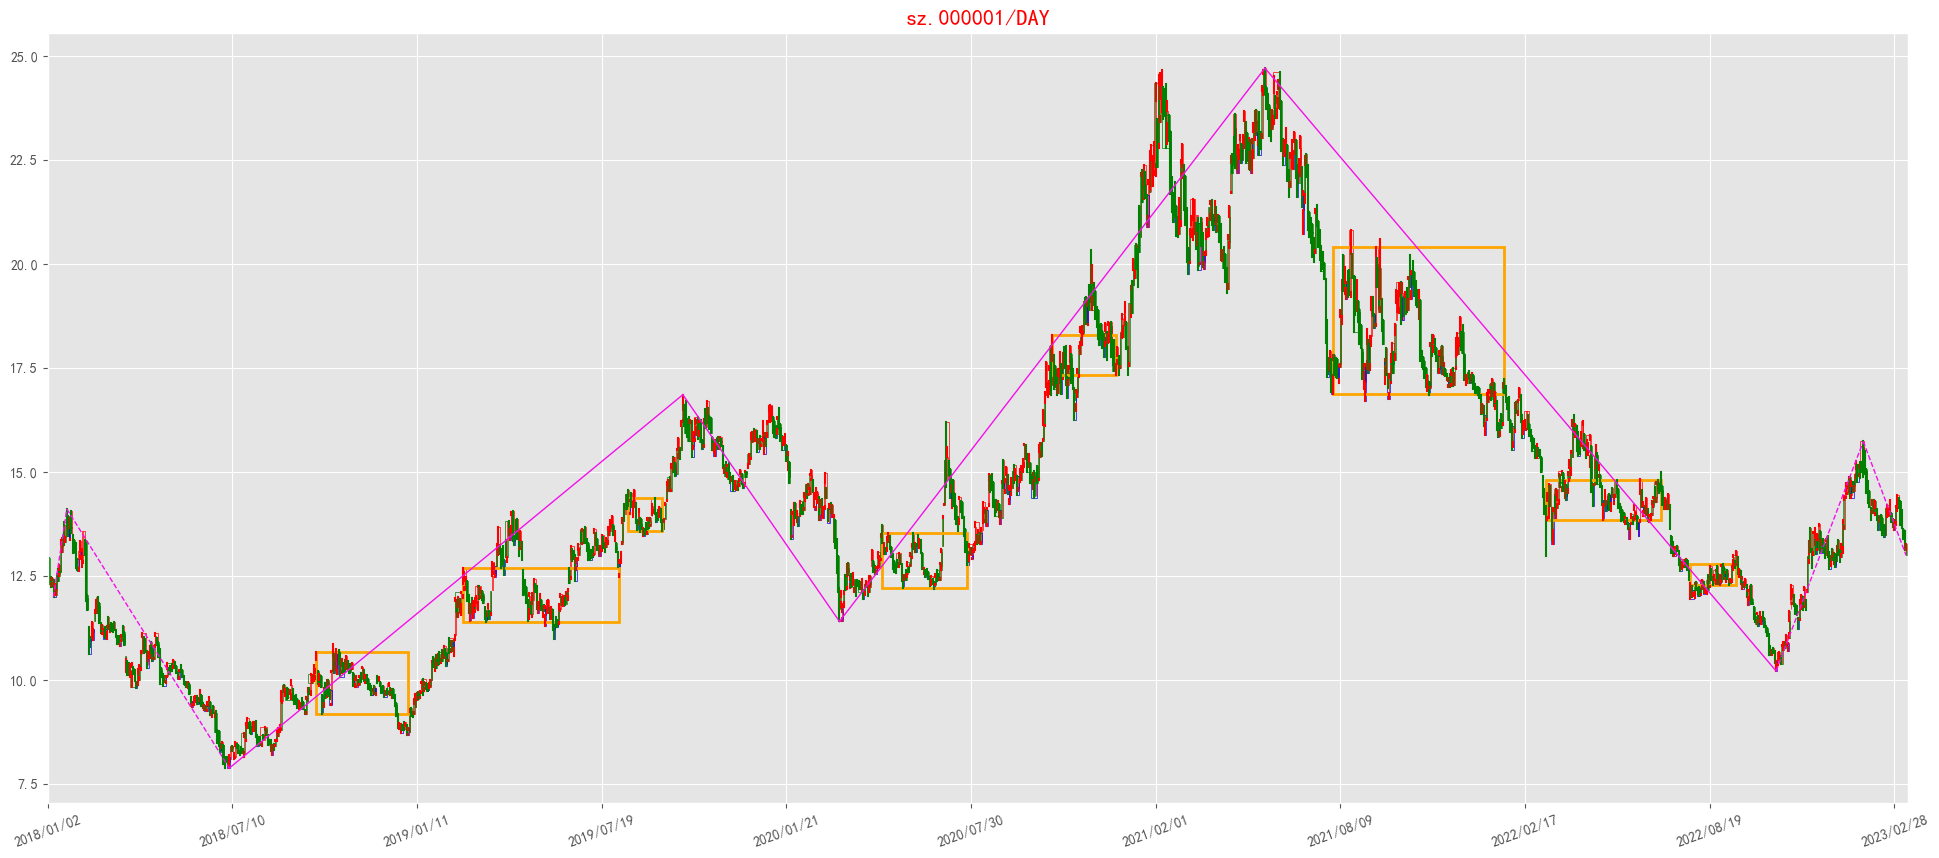

In [1]:
import os
from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.AnimatePlotDriver import CAnimateDriver
from Plot.PlotDriver import CPlotDriver
from Tools.DebugTool import cprint
from colorama import Fore, Back, Style

# import echarts
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime
from pyecharts.globals import ThemeType
from pyecharts.globals import CurrentConfig
from pyecharts.charts import   EffectScatter 

CurrentConfig.ONLINE_HOST = "https://cdn.kesci.com/lib/pyecharts_assets/"

# %matplotlib inline
# %pylab inline

code = "sz.000001"
begin_time = "2018-01-01"
end_time = None
data_src = DATA_SRC.BAO_STOCK
lv_list = [KL_TYPE.K_DAY]

config = CChanConfig({
    "bi_strict": True,
    "triger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": False,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warming": True,
})

plot_config = {
    "plot_kline": True,
    # "plot_kline": False,
    "plot_kline_combine": True,
    "plot_bi": False,
    # 'plot_boll': True,
    # "plot_seg": False,
    "plot_seg": True,
    
    # "plot_eigen": True,
    # "plot_segseg": False,    
    "plot_zs": True,
    # "plot_zs": False,
    # "plot_macd": True,
    # "plot_mean": False,
    # "plot_channel": True,
    "plot_bsp": True,
    # "plot_bsp": False,
    "plot_extrainfo": True,
}

plot_para = {
    "seg": {
    },
    "bi": {
        # "show_num": True,
        # "disp_end": True,
    },
    "figure": {
        # "x_range": 50,
    },
}
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

if not config.triger_step:
    
    plot_driver = CPlotDriver(
        chan,
        plot_config=plot_config,
        plot_para=plot_para,
    )
else:
    plot_driver=CAnimateDriver(
        chan,
        plot_config=plot_config,
        plot_para=plot_para,
    )

cprint(  " notebook.ipynb:100:plot_driver",pcolor= Fore.RED)    
print( plot_driver.version) 
print( type (plot_driver.echartsData))




kline = Kline()
kline.set_global_opts(
        xaxis_opts=opts.AxisOpts(is_scale=True),
        yaxis_opts=opts.AxisOpts(
            is_scale=True,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        datazoom_opts=[opts.DataZoomOpts(pos_bottom="-2%")],
    )


per_js = """function (param) {return param.substring(2,10);}"""

#  str.substring(1, 3)

kline.add_xaxis(plot_driver.echartsData['x'])
                
    #             ,label_opts=opts.LabelOpts(
    #     formatter=JsCode(per_js)# 通过执行JavaScript代码将标签转为百分比
    #     )
    # )

kline.add_yaxis("K 线图", plot_driver.echartsData['y'])
kline.set_global_opts(title_opts=opts.TitleOpts(title="xxx"),
                            xaxis_opts=opts.AxisOpts(name_rotate=60,
                                                    axislabel_opts=opts.LabelOpts(rotate=65, formatter=JsCode(per_js)) ,
                                                    # axislabel_opts={"rotate":45}
                                                      ))
        


grid_chart = Grid(init_opts=opts.InitOpts(width='100%', height='800px' , theme='dark'))
grid_chart.add(
    kline,
    grid_opts=opts.GridOpts(width="96%", height="65%", pos_left='2%', ),
)
grid_chart.render_notebook()    
# jsons=grid_chart.dump_options();
# print(jsons)
